In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")
df.head()

engine_displacement  num_cylinders  horsepower  vehicle_weight  \
0                  170            3.0       159.0     3413.433759   
1                  130            5.0        97.0     3149.664934   
2                  170            NaN        78.0     3079.038997   
3                  220            4.0         NaN     2542.392402   
4                  210            1.0       140.0     3460.870990   

   acceleration  model_year  origin fuel_type         drivetrain  num_doors  \
0          17.7        2003  Europe  Gasoline    All-wheel drive        0.0   
1          17.8        2007     USA  Gasoline  Front-wheel drive        0.0   
2          15.1        2018  Europe  Gasoline  Front-wheel drive        0.0   
3          20.2        2009     USA    Diesel    All-wheel drive        2.0   
4          14.4        2009  Europe  Gasoline    All-wheel drive        2.0   

   fuel_efficiency_mpg  
0            13.231729  
1            13.688217  
2            14.246341  
3            16.912736  
4            12.488369

# EDA

### Look at the fuel_efficiency_mpg variable. Does it have a long tail?

<Axes: xlabel='horsepower', ylabel='Count'>

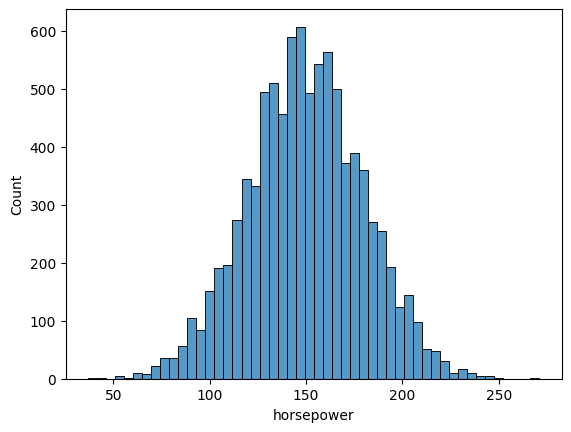

In [223]:
import seaborn as sns

sns.histplot(df['horsepower'], bins = 50)

# Question 1

### There's one column with missing values. What is it?

In [224]:
# column with missing value
missing = df.isna().sum()
missing

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

# Question 2

### What's the median (50% percentile) for variable 'horsepower'?

In [225]:
car_data['horsepower'] = df['horsepower'].fillna(0)
median = np.percentile(df['horsepower'], 50)
print(median)

nan


In [226]:
# Shuffle the dataset (the filtered one you created above), use seed 42
np.random.seed(42)
idx = np.arange(n) 
np.random.shuffle(idx)

In [227]:
# Split your data in train/val/test sets, with 60%/20%/20% distribution
n = len(car_data)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

df_train = df.iloc[idx[n_train:]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [228]:
len(df_train) ,  len(df_val) ,  len(df_test)

(3880, 1940, 1940)

# Question 3

In [229]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [230]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)

In [231]:
base = ['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']

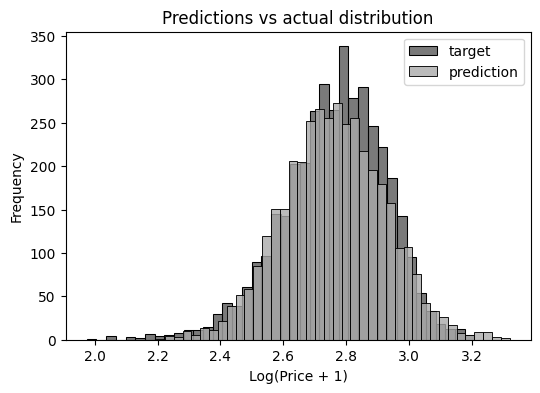

When filled with 0, the rmse is  0.02
When filled with 0, the validation rmse is  1.864


In [235]:
# fill with 0
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')
plt.show()

# rmse
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)
rmse_value = rmse(y_train, y_pred)
print('When filled with 0, the rmse is ' , round(rmse_value, 3))

# data validation
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse_val = rmse(y_val, y_pred)
print('When filled with 0, the validation rmse is ' , round(rmse_val, 3))

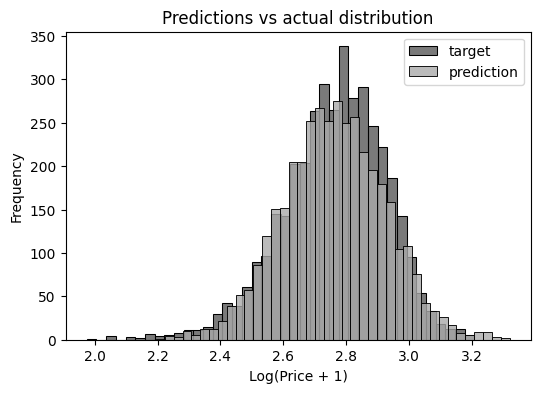

When filled with mean, the rmse is  0.02
When filled with mean, the validation rmse is  1.859


In [234]:
# fill with mean
def prepare_X2(df):
    df_num = df[base]
    df_num = df_num.fillna(df['horsepower'].mean())
    X = df_num.values
    return X

X_train = prepare_X2(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')
plt.show()

# rmse
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)
rmse_value = rmse(y_train, y_pred)
print('When filled with mean, the rmse is ' , round(rmse_value, 3))

# data validation
X_val = prepare_X2(df_val)
y_pred = w0 + X_val.dot(w)
rmse_val = rmse(y_val, y_pred)
print('When filled with mean, the validation rmse is ' , round(rmse_val, 3))

# Question 4

# Question 5

# Question 6